# Demand Forcasting for Retail Store using Time series Technique


### Import necessary libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.metrics import mean_squared_error

### Load Dataset

In [4]:
df = pd.read_csv('sales_data.csv')

In [5]:
df.head()

,Date,Sales,Product Category
0,2023-01-01,222,Electronics
1,2023-01-02,97,Books
2,2023-01-03,167,Books
3,2023-01-04,242,Electronics
4,2023-01-05,373,Electronics


In [6]:
df.isnull().sum()

Date                0
Sales               0
Product Category    0
dtype: int64

### Convert Date column to Datetime Type

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

### Set the date column as index with explicit frequency

In [8]:
df.set_index('Date', inplace=True)
df.index.freq = 'D'

In [9]:
df.head()

,Sales,Product Category
Date,,
2023-01-01,222,Electronics
2023-01-02,97,Books
2023-01-03,167,Books
2023-01-04,242,Electronics
2023-01-05,373,Electronics


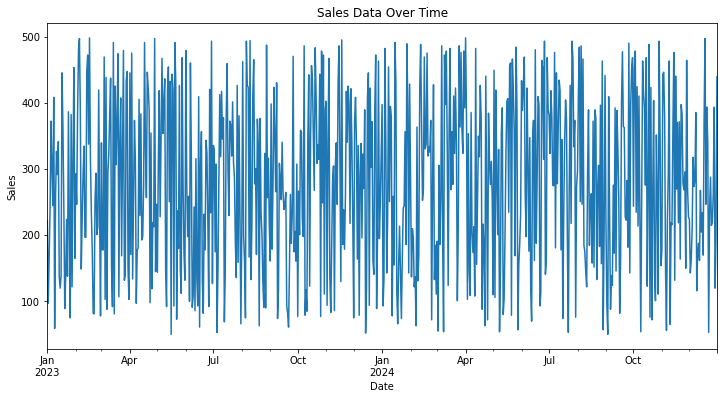

In [10]:
df['Sales'].plot(figsize =(12,6))
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Decompose the time series into trend,seasonality and residuals

In [11]:
decomposition = seasonal_decompose(df['Sales'], model='additive')

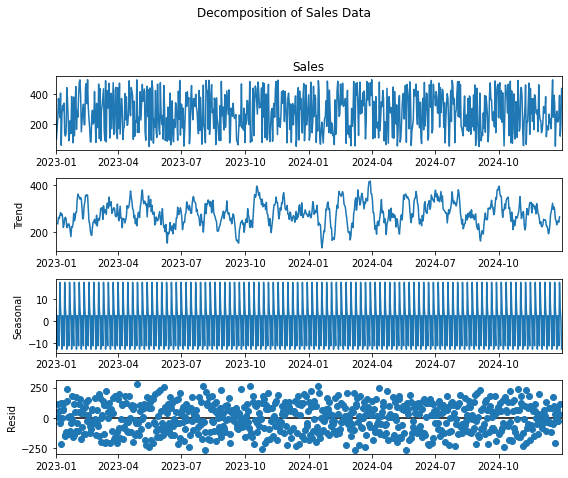

In [13]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 8, 6 
fig = decomposition.plot()
plt.suptitle('Decomposition of Sales Data' , y=1.1)
plt.show()

### Multiplicative Seasonal Decomposition

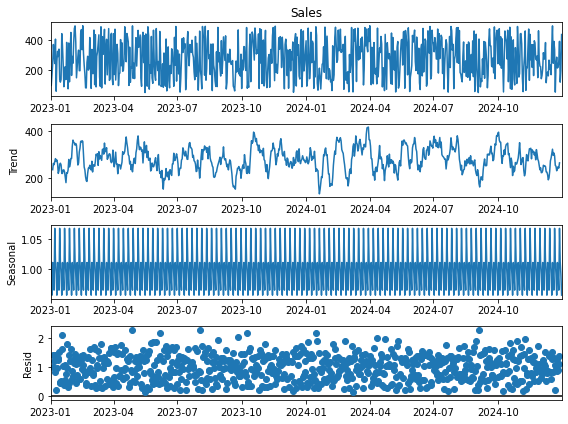

In [14]:
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

### Build and evaluate time series forecast

In [15]:
train_size = int(len(df) * 0.8)
train_size

584

In [16]:
len(df)

731

In [17]:
df.shape

(731, 2)

In [18]:
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [19]:
print(train_data)
print(test_data)

            Sales Product Category
Date                              
2023-01-01    222      Electronics
2023-01-02     97            Books
2023-01-03    167            Books
2023-01-04    242      Electronics
2023-01-05    373      Electronics
...           ...              ...
2024-08-02    415         Clothing
2024-08-03    485         Clothing
2024-08-04    251            Books
2024-08-05    487         Clothing
2024-08-06    247            Books

[584 rows x 2 columns]
            Sales Product Category
Date                              
2024-08-07    467            Books
2024-08-08    185            Books
2024-08-09    175         Clothing
2024-08-10    144      Electronics
2024-08-11    122      Electronics
...           ...              ...
2024-12-27    261         Clothing
2024-12-28    394         Clothing
2024-12-29    120         Clothing
2024-12-30    198      Electronics
2024-12-31    440         Clothing

[147 rows x 2 columns]


### Simple Time Series Method Naive method

In [20]:
y_hat_naive = test_data.copy()
y_hat_naive['naive_forecast'] = train_data['Sales'][train_size-1]

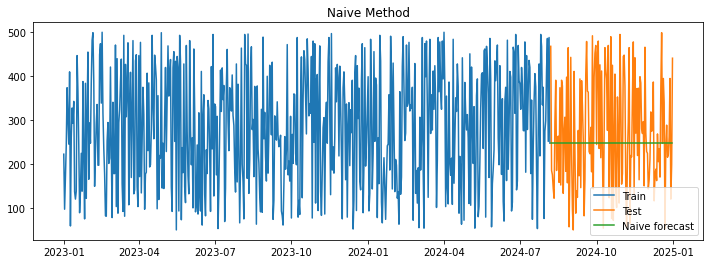

In [21]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [22]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_naive['naive_forecast'])/test_data['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,127.03,54.85


### Simple average method

In [23]:
y_hat_avg = test_data.copy()
y_hat_avg['avg_forecast'] = train_data['Sales'].mean()

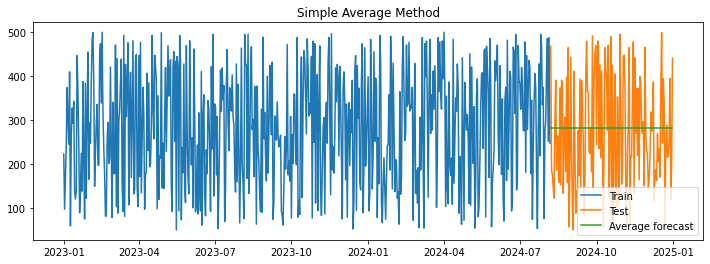

In [24]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [25]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_avg['avg_forecast'])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,127.03,54.85
0,Simple average method,124.54,62.83


### Simple Moving Average

In [26]:
y_hat_sma = df.copy()
ma_window = 10
y_hat_sma['sma_forecast'] = df['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_size:] = y_hat_sma['sma_forecast'][train_size-1]

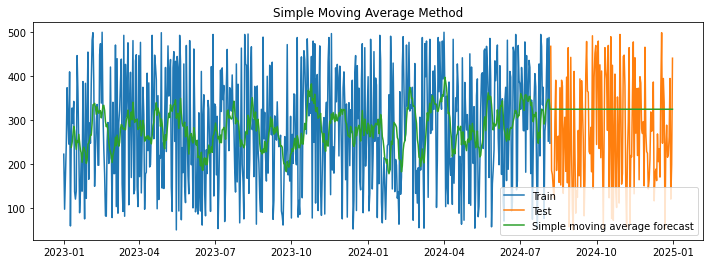

In [27]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [28]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_sma['sma_forecast'][train_size:])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_sma['sma_forecast'][train_size:])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,127.03,54.85
0,Simple average method,124.54,62.83
0,Simple moving average forecast,134.34,76.21


### Most suitable moving average window is 10 which gives RMSE 134.34 and MAPE is 76.21

### Exponential smoothing methods

### Holt's method with trend

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test_data.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_data))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 196.53333333333325, 'initial_trend': 7.466666666666679, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


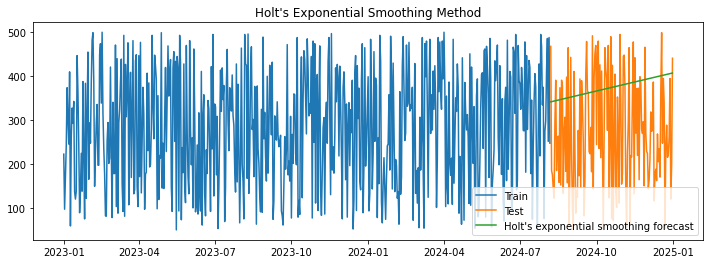

In [30]:
plt.figure(figsize=(12,4))
plt.plot( train_data['Sales'], label='Train')
plt.plot(test_data['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test_data['Sales']-y_hat_holt['holt_forecast'])/test_data['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,127.03,54.85
0,Simple average method,124.54,62.83
0,Simple moving average forecast,134.34,76.21
0,Holt's exponential smoothing method,160.73,92.95


### Holt Winters' additive method with trend and seasonality

In [32]:
model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()

In [33]:
forecast = model.forecast(len(test_data))

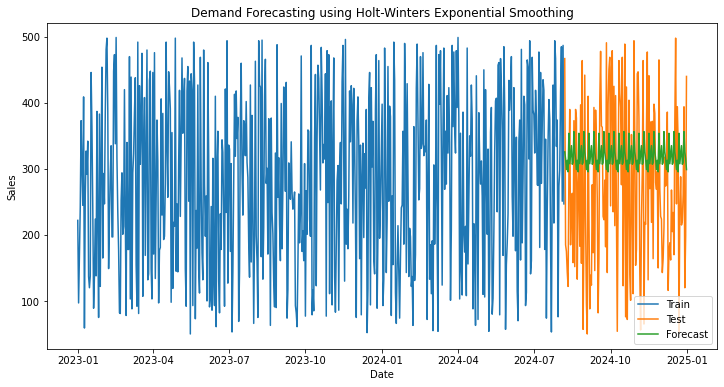

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Train')
plt.plot(test_data.index, test_data['Sales'], label='Test')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Demand Forecasting using Holt-Winters Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [35]:
y_hat_hwa = test_data.copy()
model = ExponentialSmoothing(np.asarray(train_data['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test_data))

{'smoothing_level': 0.043768409413837826, 'smoothing_trend': 0.017600714565249982, 'smoothing_seasonal': 0.06805947549975098, 'damping_trend': nan, 'initial_level': 256.3814661335822, 'initial_trend': 0.35596600708441967, 'initial_seasons': array([ 18.15373348, -99.41145023, -39.96066816, -79.33909056,
        59.06883251,  39.04847173, -51.16758491,  24.58993866,
       -20.16053611,  21.39550517,  45.97120774,  73.89935745]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [36]:
actual = test_data['Sales']
predicted = forecast
rmse = np.sqrt(mean_squared_error(actual, predicted))

In [37]:
rmse

132.1838591980545

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [39]:
mape = mean_absolute_percentage_error(actual, predicted) * 100

In [40]:
mape

74.08672696132533

### Holt-Winters Multiplicative Method

In [41]:
model = ExponentialSmoothing(
    train_data['Sales'],
    trend='mul',
    seasonal='mul',
    seasonal_periods=12
).fit()

In [42]:
forecast = model.forecast(len(test_data))

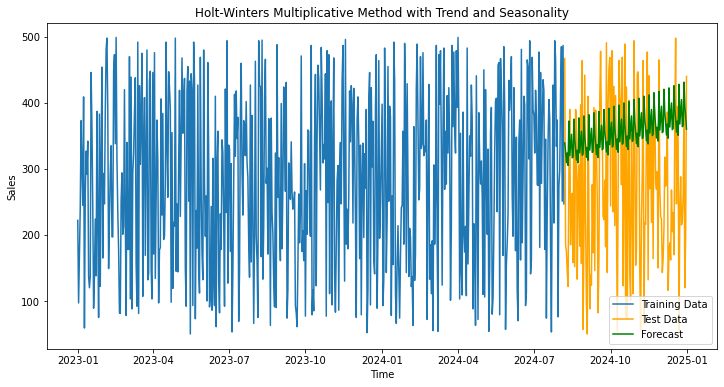

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['Sales'], label='Training Data')
plt.plot(test_data['Sales'], label='Test Data', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.legend(loc='best')
plt.title('Holt-Winters Multiplicative Method with Trend and Seasonality')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(test_data['Sales'], forecast))

In [91]:
rmse

150.72099307293175

In [92]:
mape = mean_absolute_percentage_error(test_data['Sales'], forecast) * 100

In [93]:
mape

86.54945914078922